In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('/Users/sumedha/Desktop/Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
dataset.head()
X.shape[1]

13

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


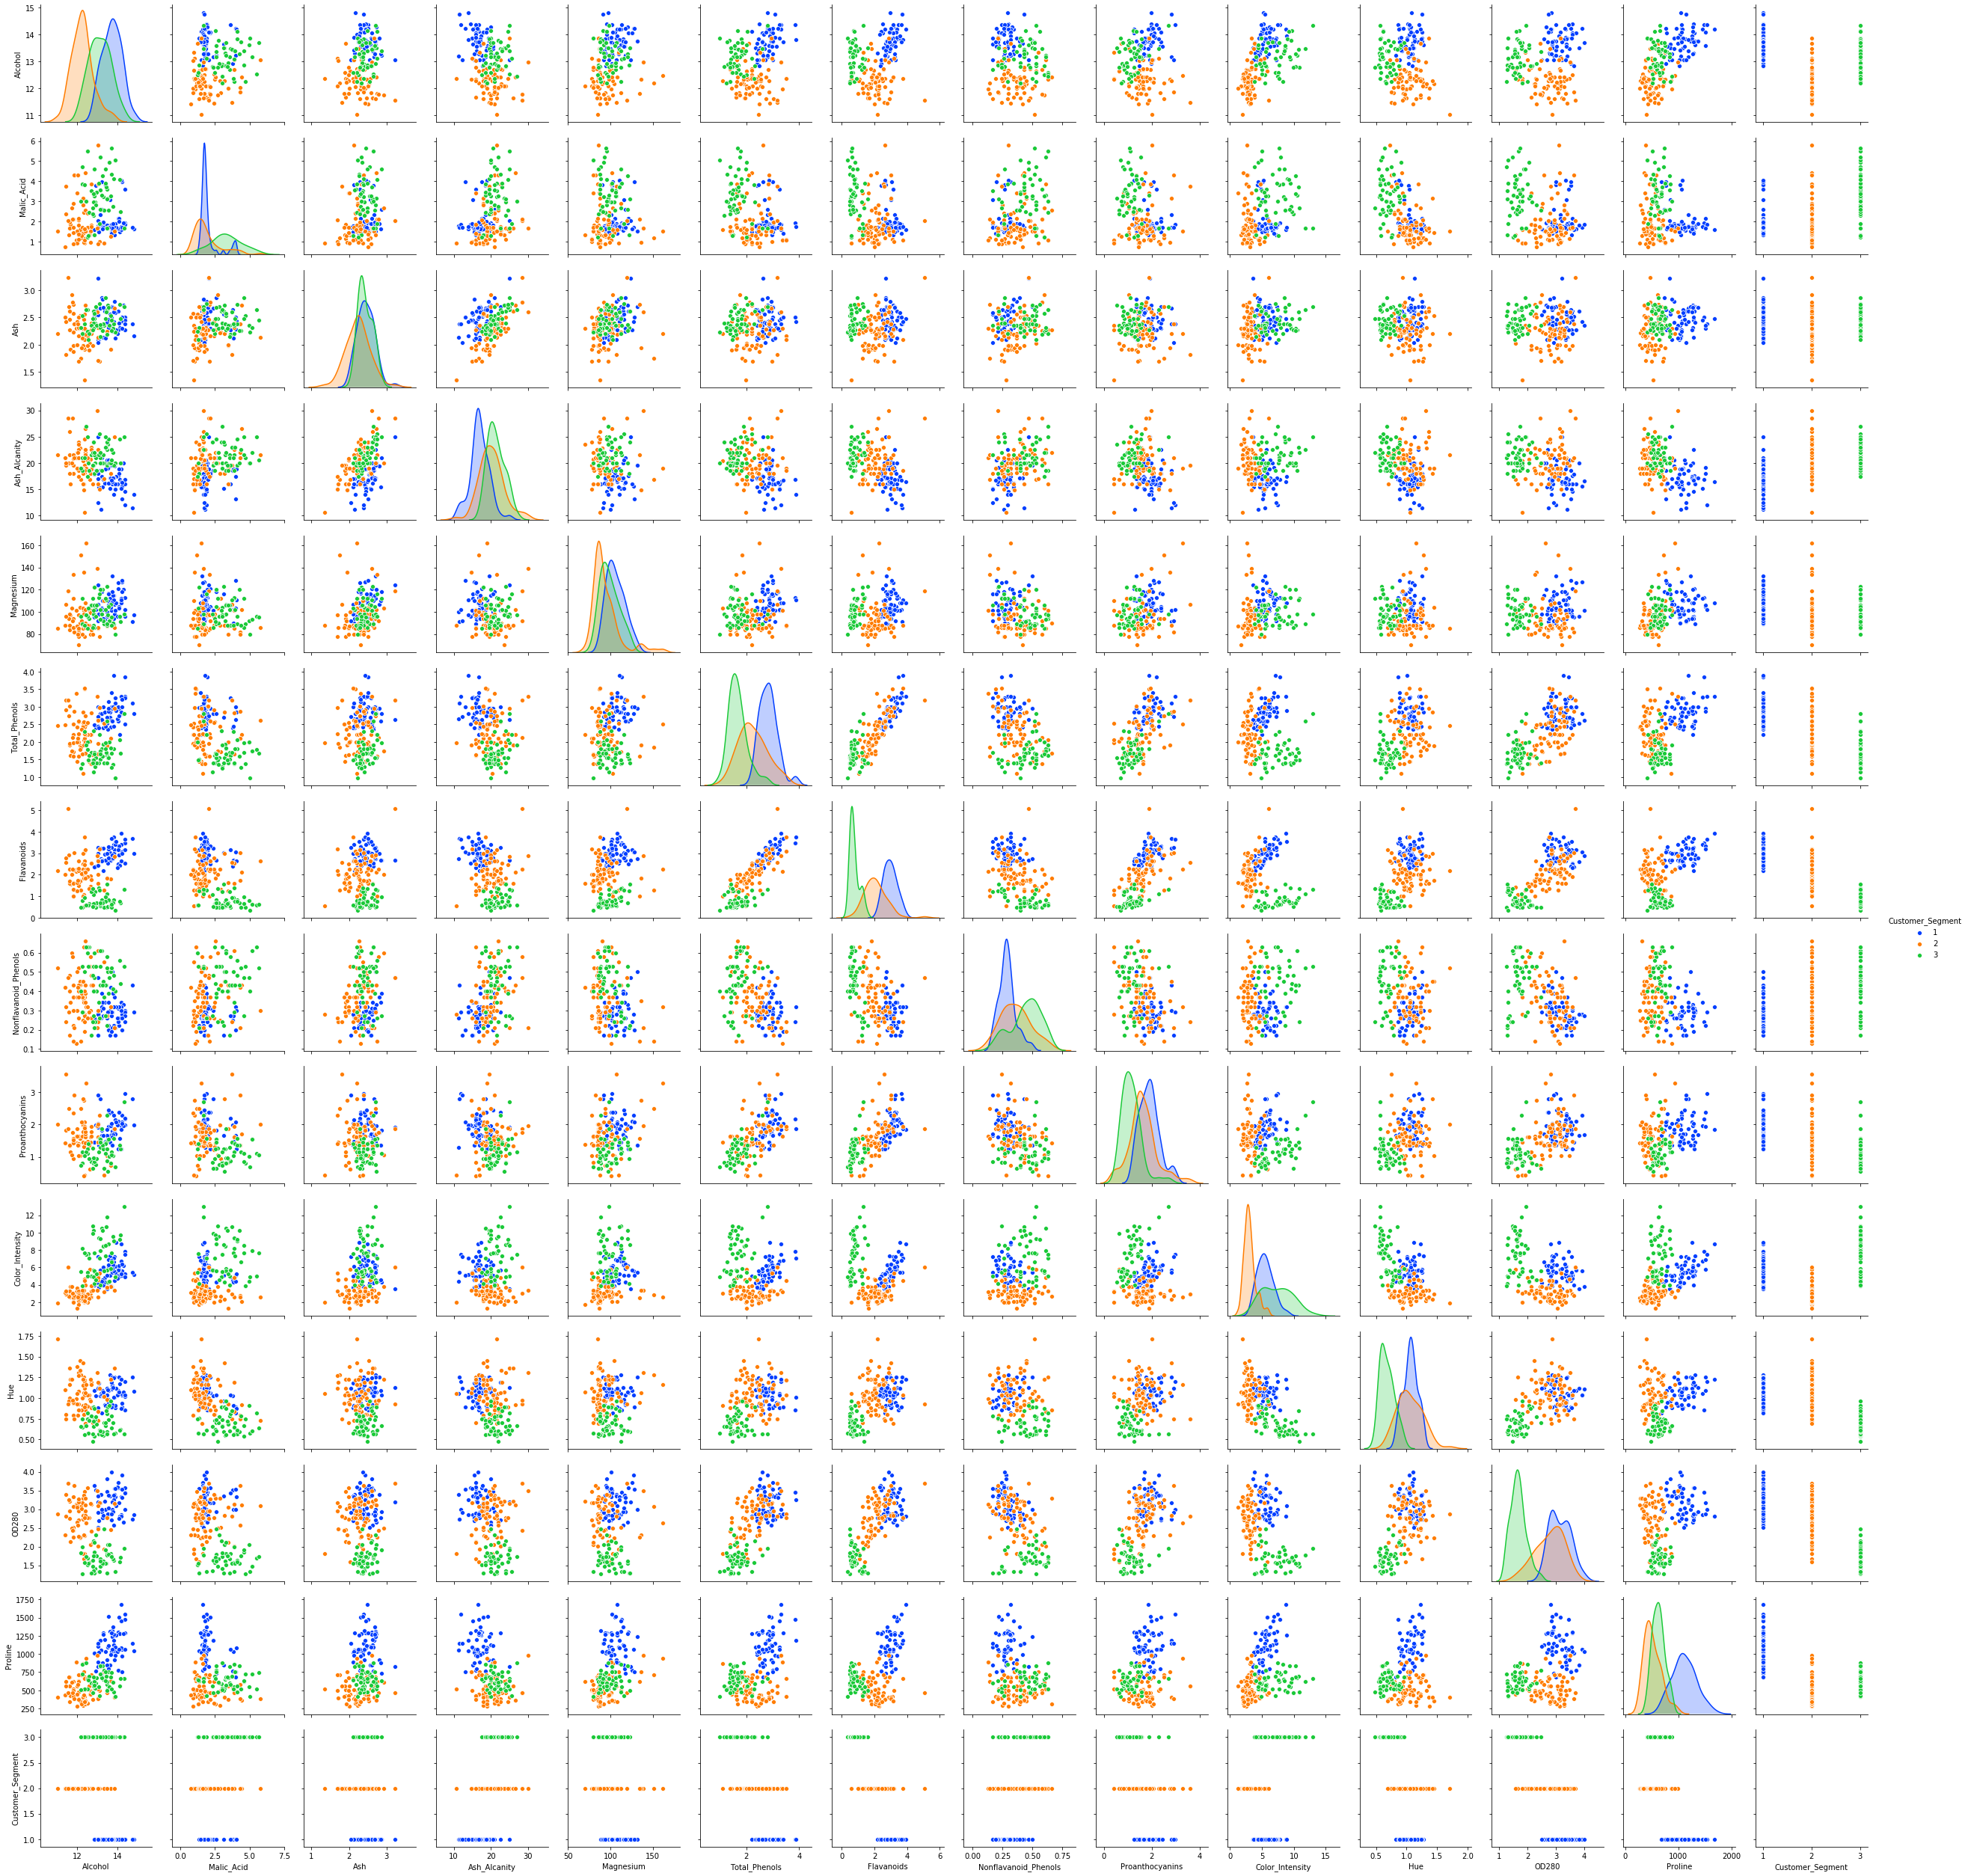

In [5]:
sns.pairplot(dataset, hue='Customer_Segment',palette="bright")

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Applying SVM
from sklearn.svm import SVC
model = SVC(kernel = 'rbf',gamma = .1)
model.fit(X_train,y_train)
y_predict_train = model.predict(X_train)

In [8]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
acc_test = accuracy_score(y_test,y_predict_test)
acc_train = accuracy_score(y_train,y_predict_train)
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(acc_test))
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(acc_train))

The accuracy of the svm classifier on test data is 0.96 out of 1
The accuracy of the svm classifier on training data is 1.00 out of 1


In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)


In [12]:
# Visualising 
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

ValueError: X.shape[1] = 2 should be equal to 13, the number of features at training time